# House Prices Advance Regression Techniques


# Life cycle of data science project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  =  pd.read_csv("D:\house prd/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Analysis

In [3]:
#percentage of nan values
feature_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in feature_with_na:
    print(feature , np.round(data[feature].isnull().mean() , 4) , '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


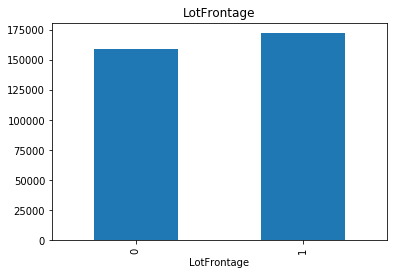

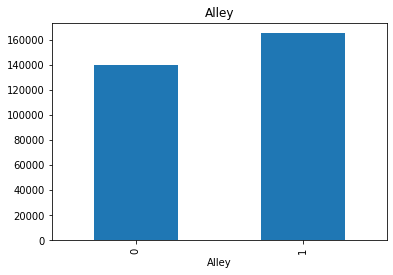

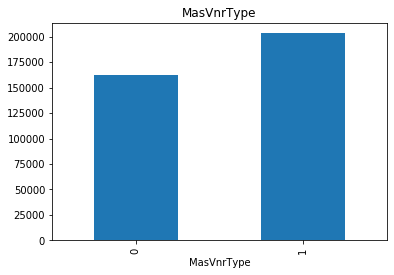

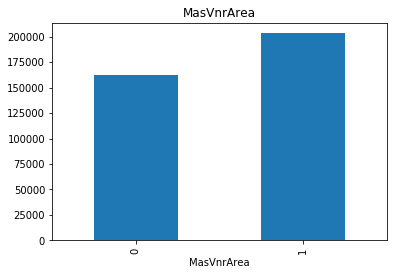

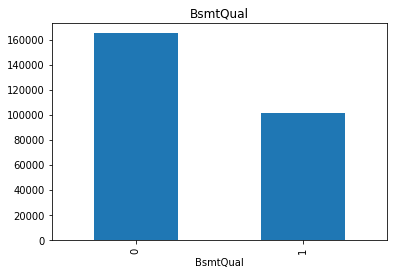

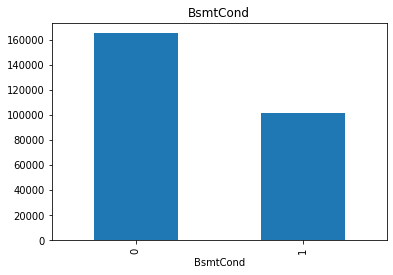

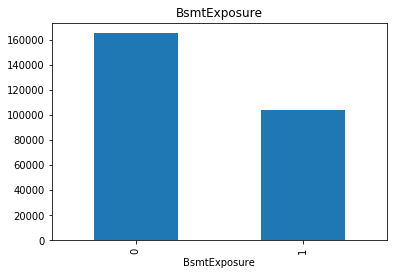

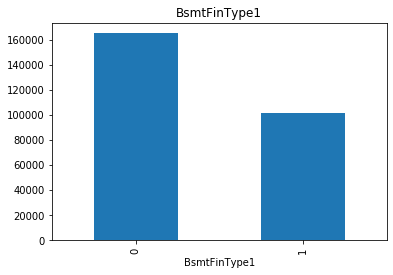

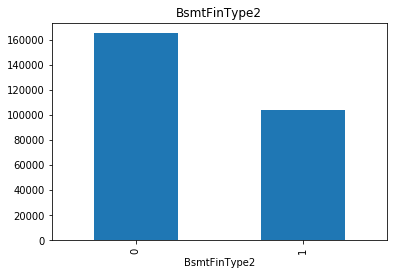

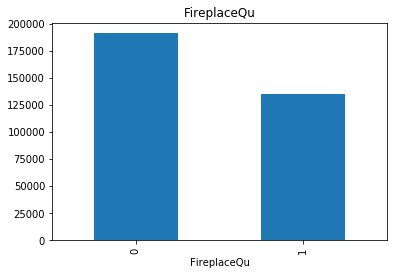

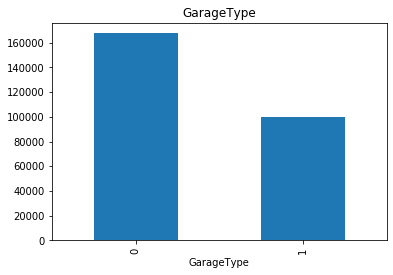

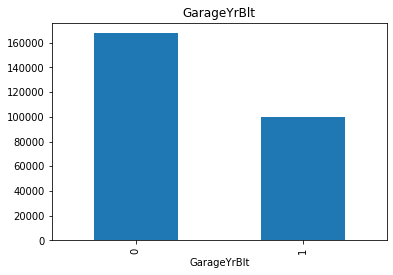

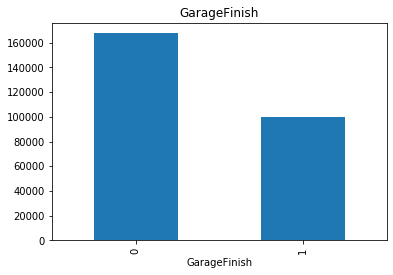

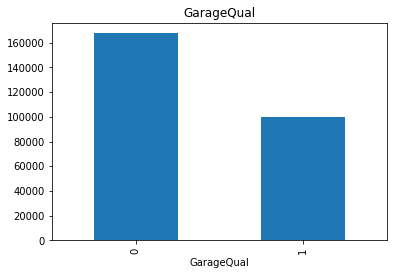

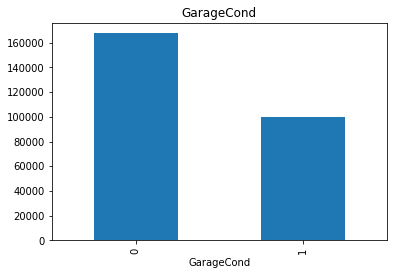

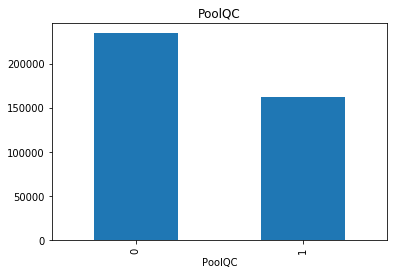

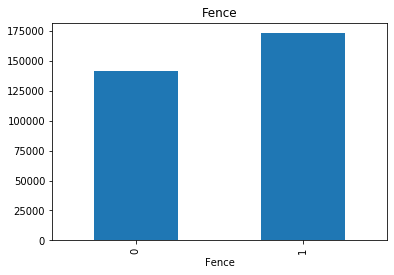

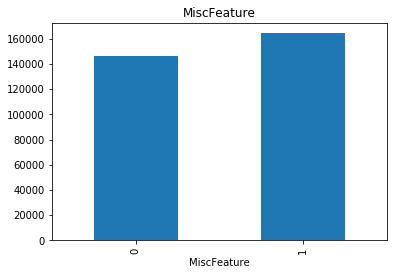

In [4]:
# there are many missing values so we need do find a relationship between missing values and sales prices
#lets make a variavle 1 if the observation was missing otherwise 0
for feature in feature_with_na:
    data1 = data.copy()
    
    data1[feature] = np.where(data1[feature].isnull() , 1 , 0)
    
    data1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [5]:
#list of numericals variables
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']

print(' number of numericals variables' , len(numerical_feature))

data[numerical_feature].head()

 number of numericals variables 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# TEMPORAL VARIABLE (DATETIME VARIABLE


In [7]:
# list of variable that contain year information
year_feature = [feature for feature in numerical_feature if  'Yr' in feature or 'Year' in feature ]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
for feature in  year_feature:
    print(feature , data[feature].unique())
    

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

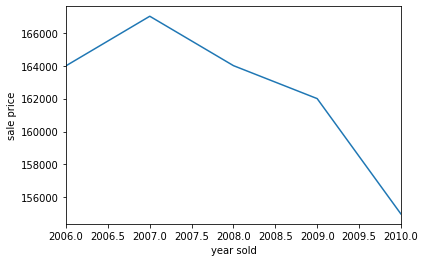

In [9]:
#analyse temporal date time variable with sale price (YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold)
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('year sold')
plt.ylabel('sale price')
plt.show()

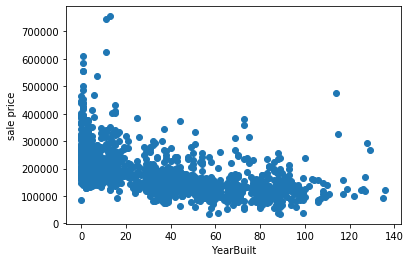

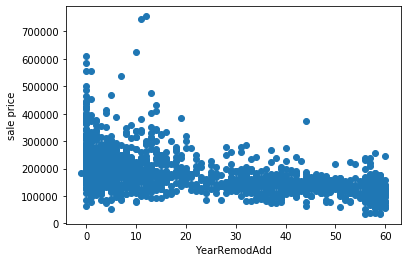

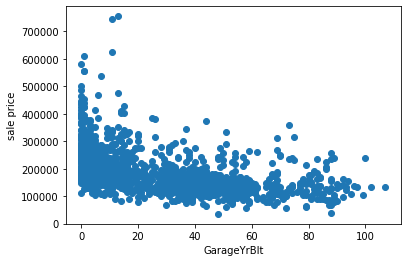

In [10]:
for feature in year_feature:
    if feature!= 'YrSold':
        data1 = data.copy()
        
        data1[feature] = data1['YrSold'] - data1[feature]
        
        plt.scatter(data1[feature], data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('sale price')
        plt.show()

In [11]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25 and feature not in year_feature + ['Id']]

In [12]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [13]:
data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


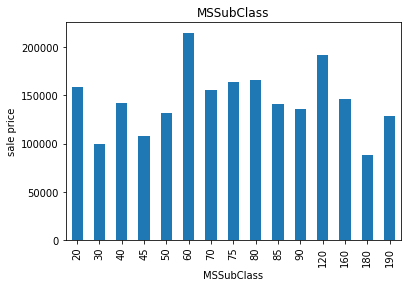

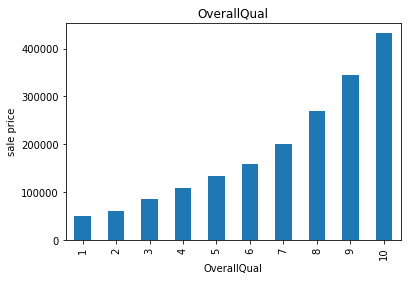

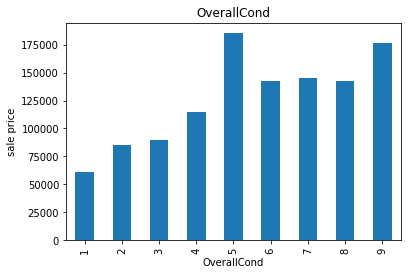

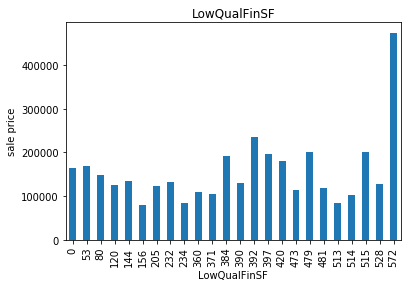

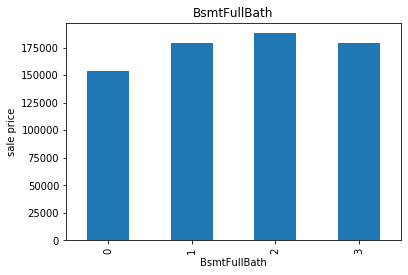

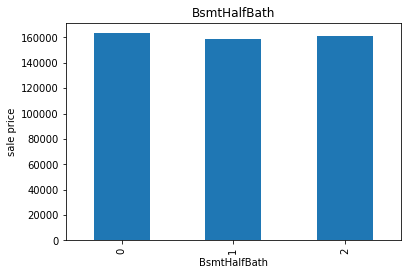

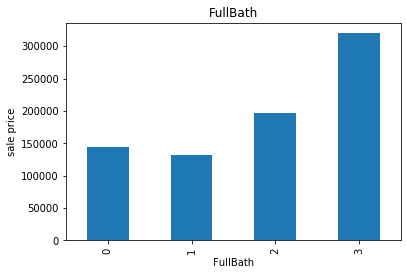

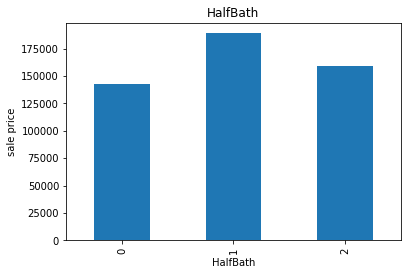

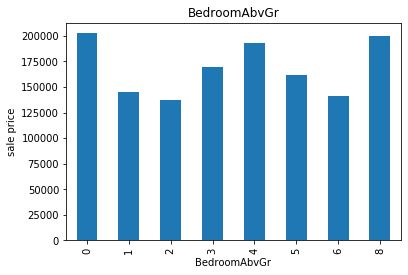

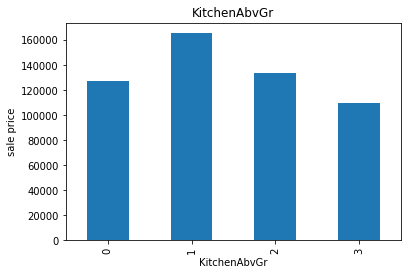

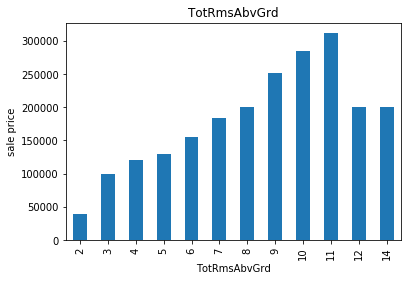

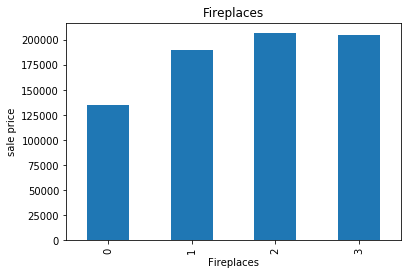

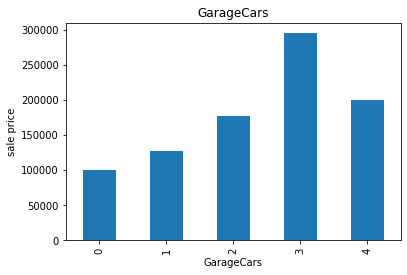

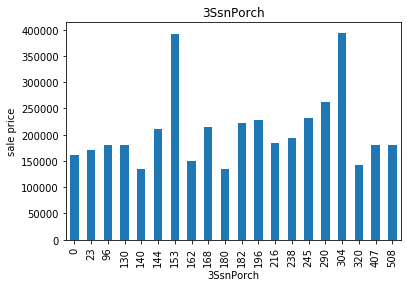

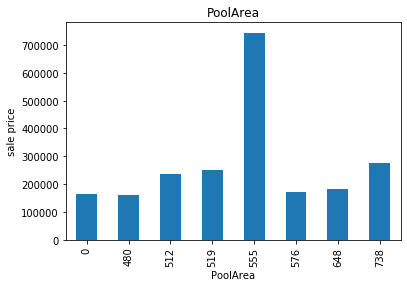

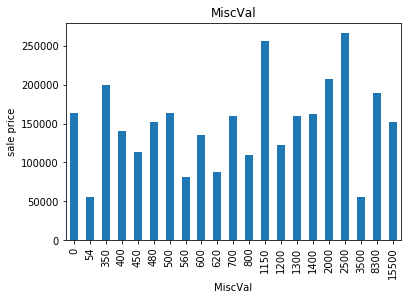

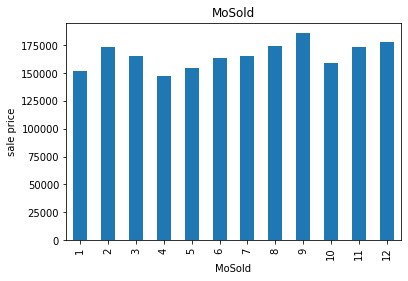

In [14]:
#lets find the relationship between them and sale price

for feature in discrete_feature:
    data1 = data.copy()
    data1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sale price')
    plt.title(feature)
    plt.show()

In [15]:
#analyse the continuous value by creating histograms to understand the distribution
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature + year_feature + ['Id']]

In [16]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

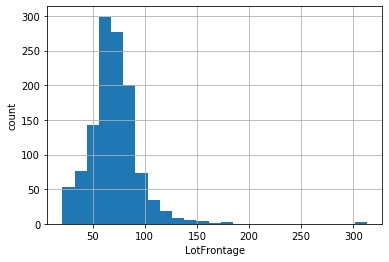

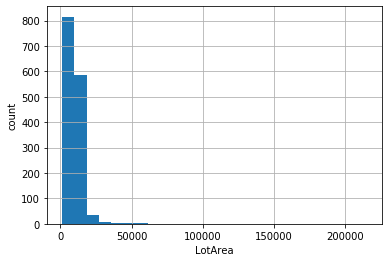

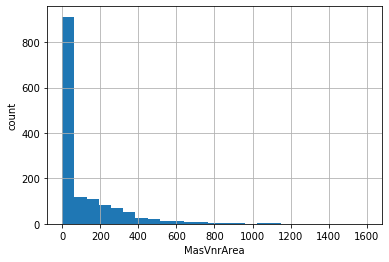

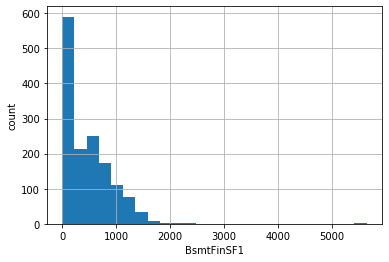

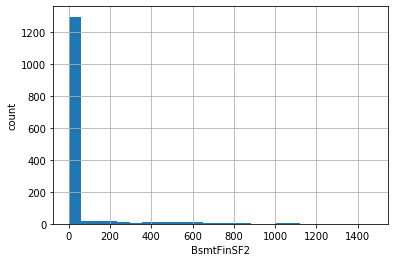

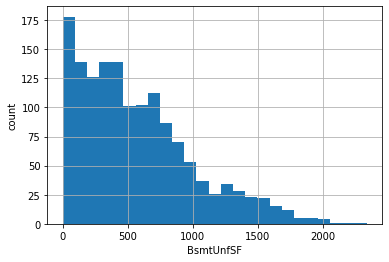

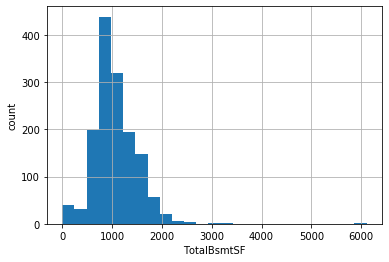

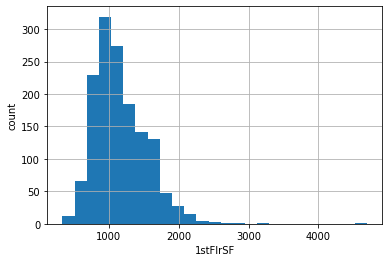

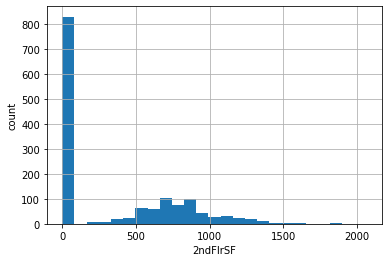

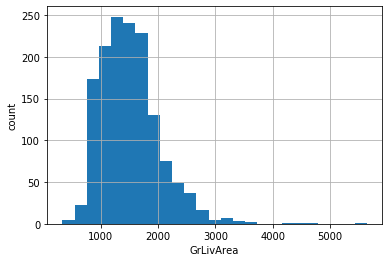

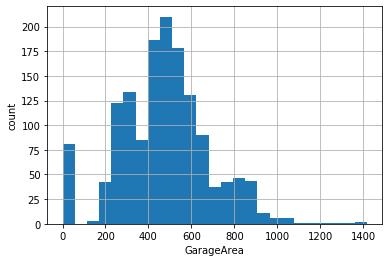

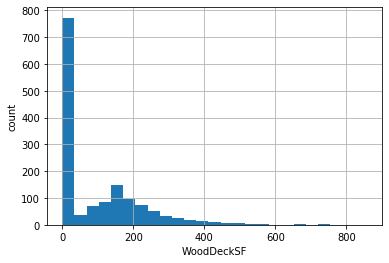

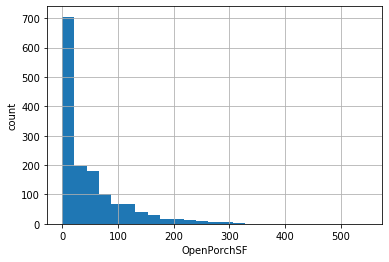

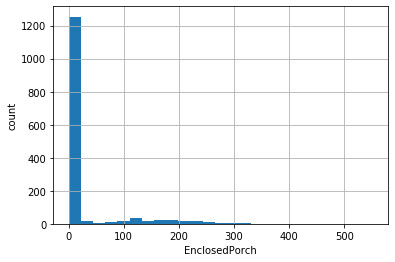

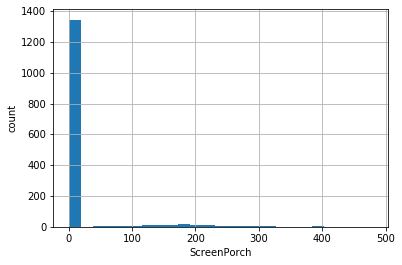

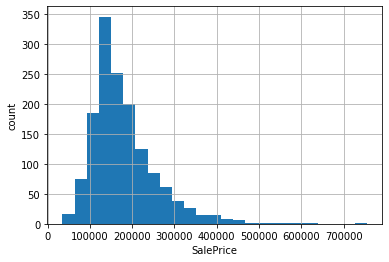

In [17]:
for feature in continuous_feature:
    data1 = data.copy()
    data1[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

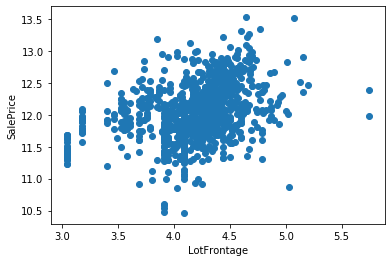

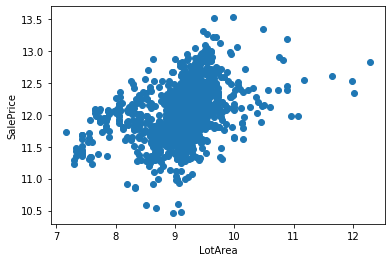

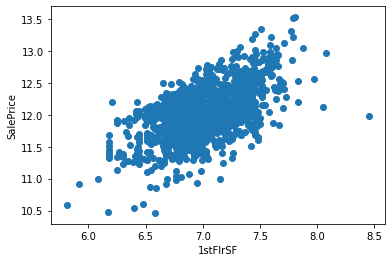

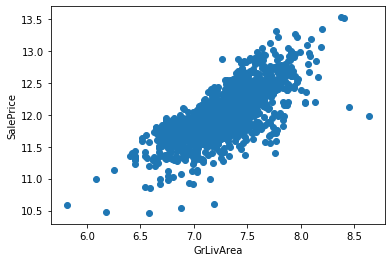

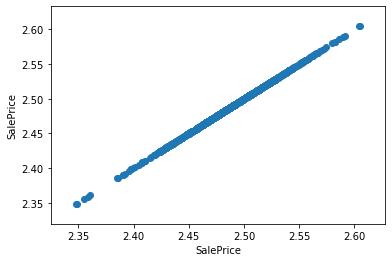

In [19]:
#we will using logarithmic c transformation
for feature in continuous_feature:
    data1 = data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data1[feature]= np.log(data1[feature])
        data1['SalePrice']= np.log(data1['SalePrice'])
        plt.scatter(data1[feature], data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
        
#u see a monotonic relation r positive correlation between two features and saleprice

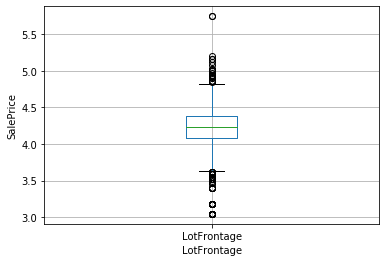

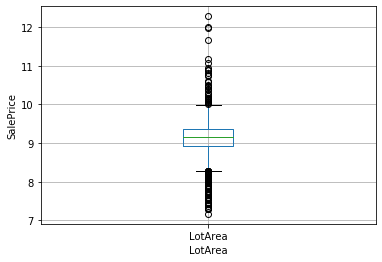

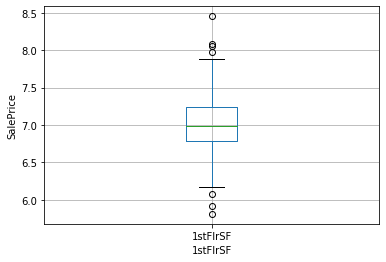

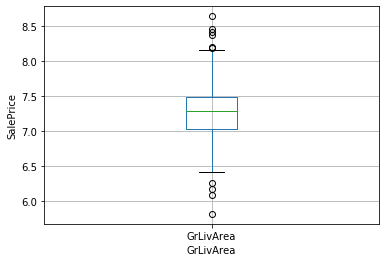

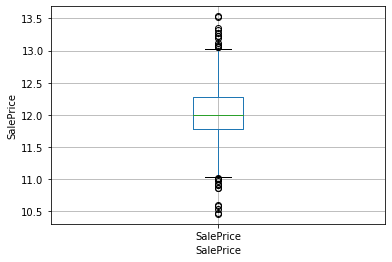

In [20]:
#for outliers
for feature in continuous_feature:
    data1 = data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data1[feature]= np.log(data1[feature])
        data1.boxplot(column= feature)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [24]:
#categorical features
categorical_feature = [feature for feature in data.columns if data[feature].dtypes =='O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
#find no. of categories in each feature
for feature in categorical_feature:
    print(f"the feature is {feature} and no of categories are {len(data[feature].unique())}")

the feature is MSZoning and no of categories are 5
the feature is Street and no of categories are 2
the feature is Alley and no of categories are 3
the feature is LotShape and no of categories are 4
the feature is LandContour and no of categories are 4
the feature is Utilities and no of categories are 2
the feature is LotConfig and no of categories are 5
the feature is LandSlope and no of categories are 3
the feature is Neighborhood and no of categories are 25
the feature is Condition1 and no of categories are 9
the feature is Condition2 and no of categories are 8
the feature is BldgType and no of categories are 5
the feature is HouseStyle and no of categories are 8
the feature is RoofStyle and no of categories are 6
the feature is RoofMatl and no of categories are 8
the feature is Exterior1st and no of categories are 15
the feature is Exterior2nd and no of categories are 16
the feature is MasVnrType and no of categories are 5
the feature is ExterQual and no of categories are 4
the fea

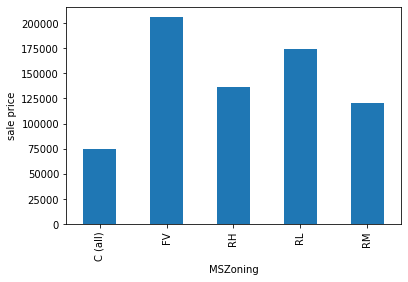

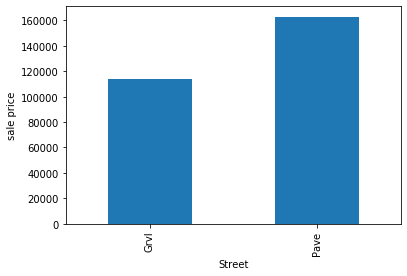

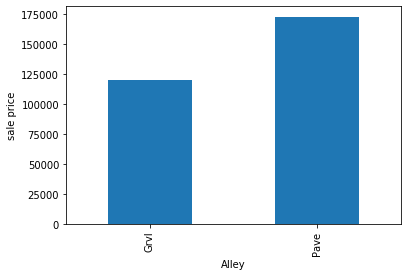

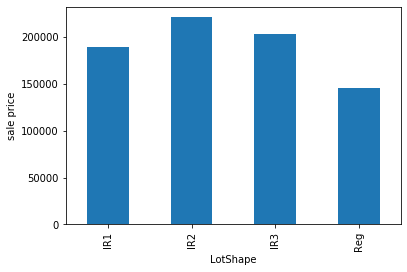

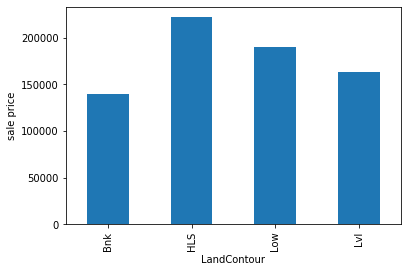

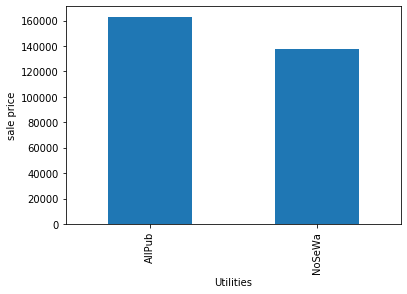

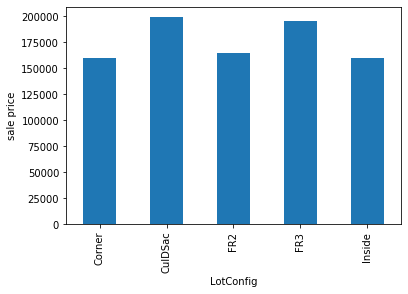

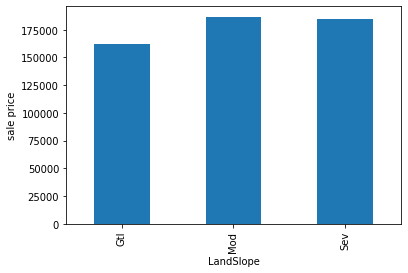

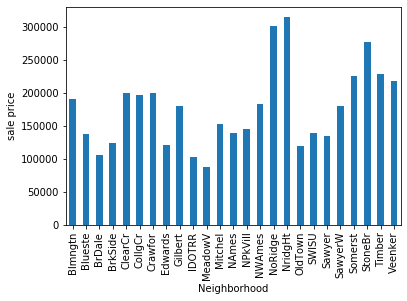

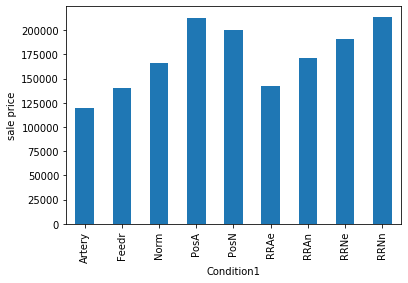

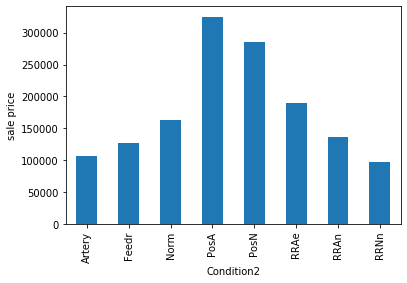

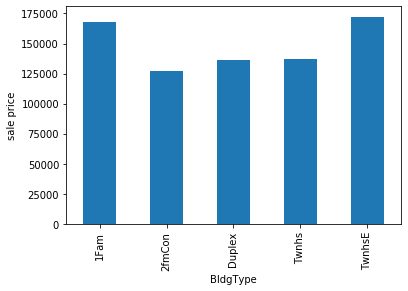

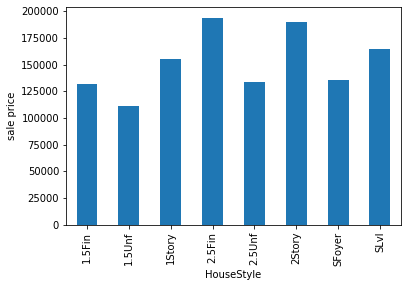

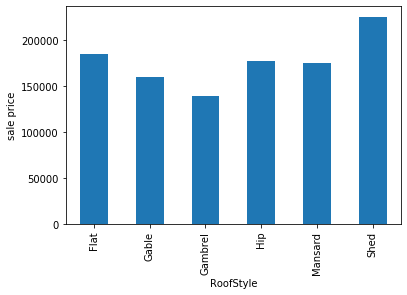

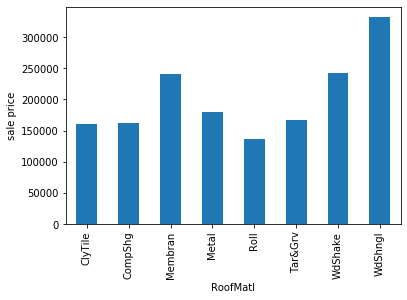

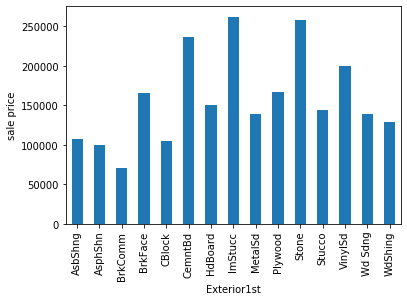

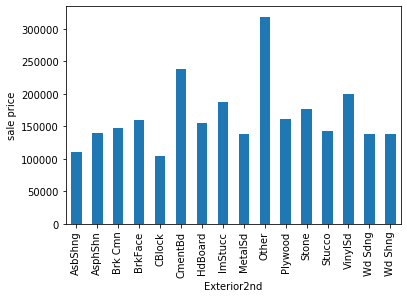

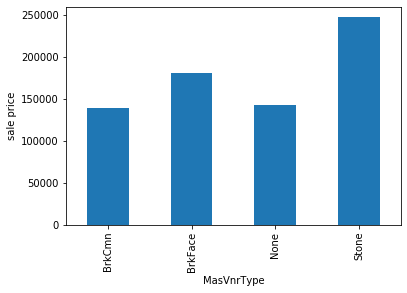

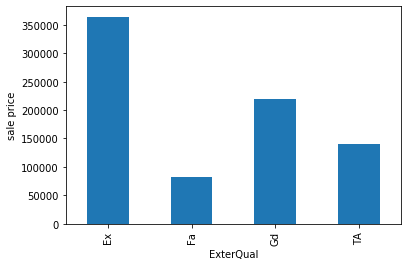

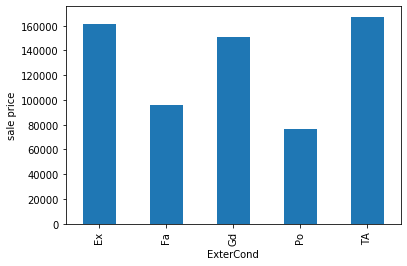

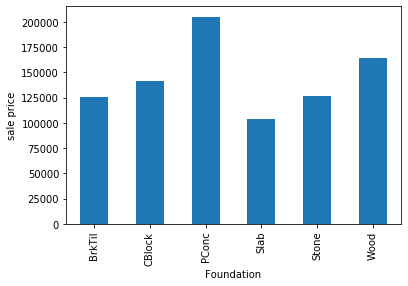

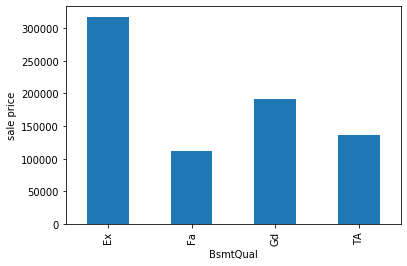

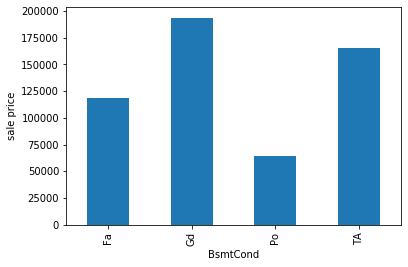

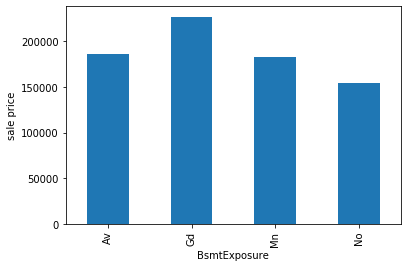

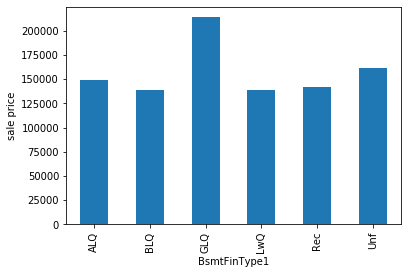

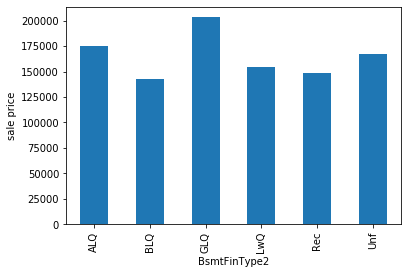

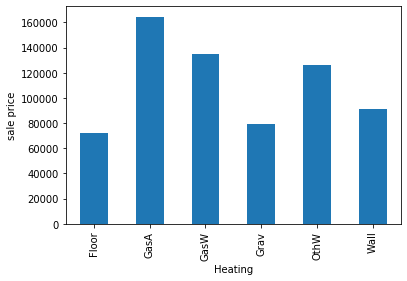

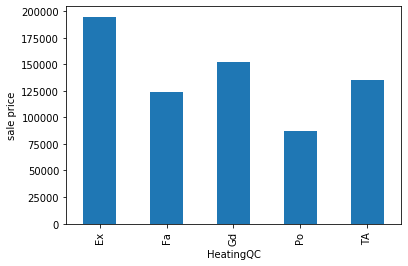

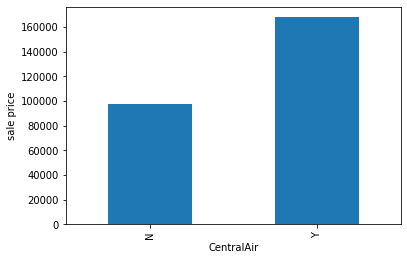

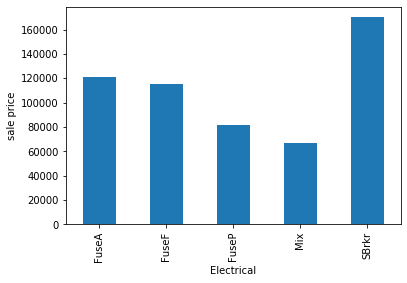

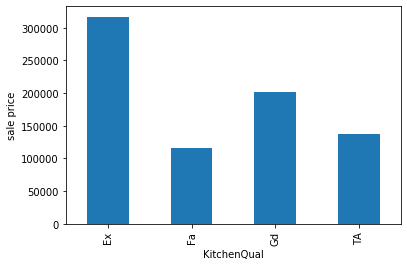

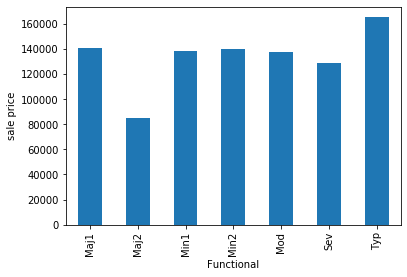

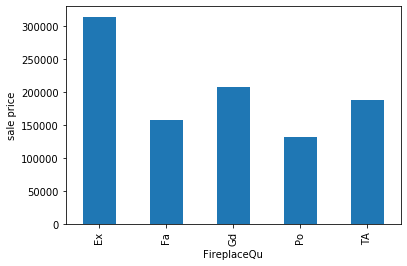

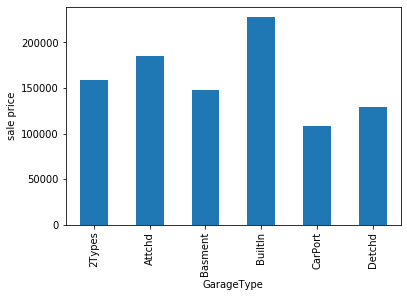

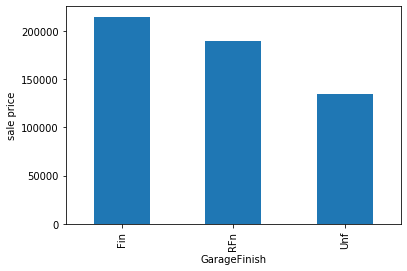

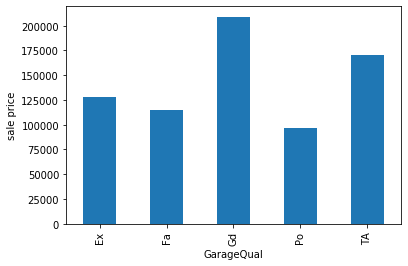

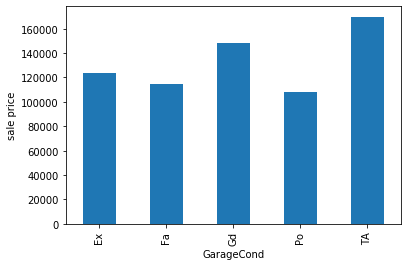

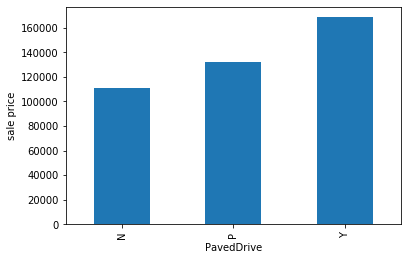

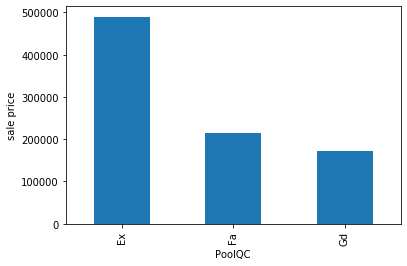

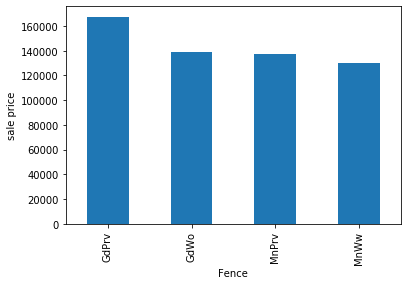

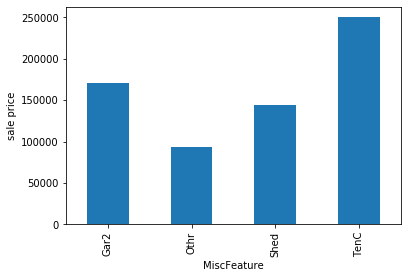

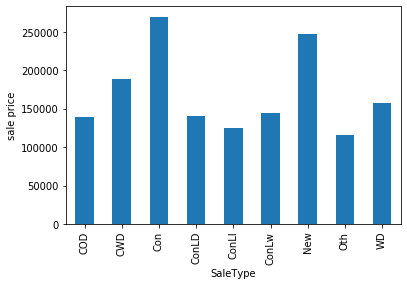

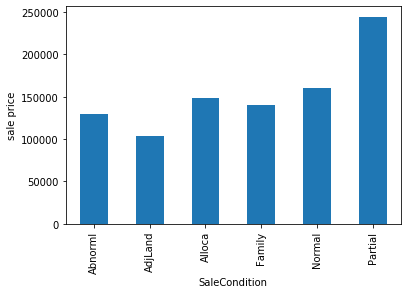

In [35]:
#relationship between categorical feature and sale price
for feature in categorical_feature:
    data1 = data.copy()
    data1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sale price')
    plt.show()